In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import uuid

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
df = pd.read_csv('global_startup_success_dataset.csv')

In [ ]:
df.head()

,Startup Name,Founded Year,Country,Industry,Funding Stage,Total Funding ($M),Number of Employees,Annual Revenue ($M),Valuation ($B),Success Score,Acquired?,IPO?,Customer Base (Millions),Tech Stack,Social Media Followers
0,Startup_1,2009,Canada,Healthcare,Series A,269,3047,104,46.11,5,No,No,43,"Java, Spring",4158814
1,Startup_2,2004,UK,Healthcare,IPO,40,630,431,33.04,1,No,Yes,64,"Node.js, React",4063014
2,Startup_3,2018,USA,Healthcare,Seed,399,2475,375,15.79,8,No,No,74,"PHP, Laravel",3449855
3,Startup_4,2014,France,Tech,Seed,404,1011,907,17.12,7,Yes,Yes,26,"Python, AI",630421
4,Startup_5,2006,Japan,Energy,Series C,419,3917,280,4.39,6,Yes,Yes,30,"Node.js, React",365956


In [ ]:
df['Acquired'] = df['Acquired?'].map({'Yes': 1, 'No': 0})
df['IPO'] = df['IPO?'].map({'Yes': 1, 'No': 0})

In [ ]:
df = df.drop(columns=['Startup Name', 'Acquired?', 'IPO?'])

In [ ]:
df.head()

,Founded Year,Country,Industry,Funding Stage,Total Funding ($M),Number of Employees,Annual Revenue ($M),Valuation ($B),Success Score,Customer Base (Millions),Tech Stack,Social Media Followers,Acquired,IPO
0,2009,Canada,Healthcare,Series A,269,3047,104,46.11,5,43,"Java, Spring",4158814,0,0
1,2004,UK,Healthcare,IPO,40,630,431,33.04,1,64,"Node.js, React",4063014,0,1
2,2018,USA,Healthcare,Seed,399,2475,375,15.79,8,74,"PHP, Laravel",3449855,0,0
3,2014,France,Tech,Seed,404,1011,907,17.12,7,26,"Python, AI",630421,1,1
4,2006,Japan,Energy,Series C,419,3917,280,4.39,6,30,"Node.js, React",365956,1,1


In [ ]:
df.isnull().sum()

Founded Year                0
Country                     0
Industry                    0
Funding Stage               0
Total Funding ($M)          0
Number of Employees         0
Annual Revenue ($M)         0
Valuation ($B)              0
Success Score               0
Customer Base (Millions)    0
Tech Stack                  0
Social Media Followers      0
Acquired                    0
IPO                         0
dtype: int64

In [ ]:
df['Age'] = 2025 - df['Founded Year']

In [ ]:
categorical_cols = ['Country', 'Industry', 'Funding Stage', 'Tech Stack']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [ ]:
df_encoded.head()

,Founded Year,Total Funding ($M),Number of Employees,Annual Revenue ($M),Valuation ($B),Success Score,Customer Base (Millions),Social Media Followers,Acquired,IPO,...,Industry_Logistics,Industry_Tech,Funding Stage_Seed,Funding Stage_Series A,Funding Stage_Series B,Funding Stage_Series C,"Tech Stack_Java, Spring","Tech Stack_Node.js, React","Tech Stack_PHP, Laravel","Tech Stack_Python, AI"
0,2009,269,3047,104,46.11,5,43,4158814,0,0,...,False,False,False,True,False,False,True,False,False,False
1,2004,40,630,431,33.04,1,64,4063014,0,1,...,False,False,False,False,False,False,False,True,False,False
2,2018,399,2475,375,15.79,8,74,3449855,0,0,...,False,False,True,False,False,False,False,False,True,False
3,2014,404,1011,907,17.12,7,26,630421,1,1,...,False,True,True,False,False,False,False,False,False,True
4,2006,419,3917,280,4.39,6,30,365956,1,1,...,False,False,False,False,False,True,False,True,False,False


In [ ]:
X = df_encoded.drop(columns=['Success Score'])
y = df_encoded['Success Score']

In [ ]:
scaler = StandardScaler()
numerical_cols = ['Total Funding ($M)', 'Number of Employees', 'Annual Revenue ($M)', 'Valuation ($B)', 'Customer Base (Millions)', 'Social Media Followers', 'Age']
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

RandomForestRegressor(random_state=42)

In [ ]:
rf_feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

In [ ]:
print(rf_feature_importance.to_string(index=False))

                  Feature  Importance
           Valuation ($B)    0.120993
   Social Media Followers    0.116613
      Number of Employees    0.116190
       Total Funding ($M)    0.110638
      Annual Revenue ($M)    0.109953
 Customer Base (Millions)    0.099468
             Founded Year    0.040658
                      Age    0.040617
                      IPO    0.013591
                 Acquired    0.013257
Tech Stack_Node.js, React    0.010627
       Funding Stage_Seed    0.010608
   Funding Stage_Series B    0.010457
   Funding Stage_Series A    0.010329
  Tech Stack_Java, Spring    0.010183
    Tech Stack_Python, AI    0.010067
   Funding Stage_Series C    0.010019
  Tech Stack_PHP, Laravel    0.009674
           Country_Brazil    0.008397
          Industry_Gaming    0.008233
          Country_Germany    0.007940
           Country_Canada    0.007897
            Country_Japan    0.007837
               Country_UK    0.007702
      Industry_Healthcare    0.007681
         Ind

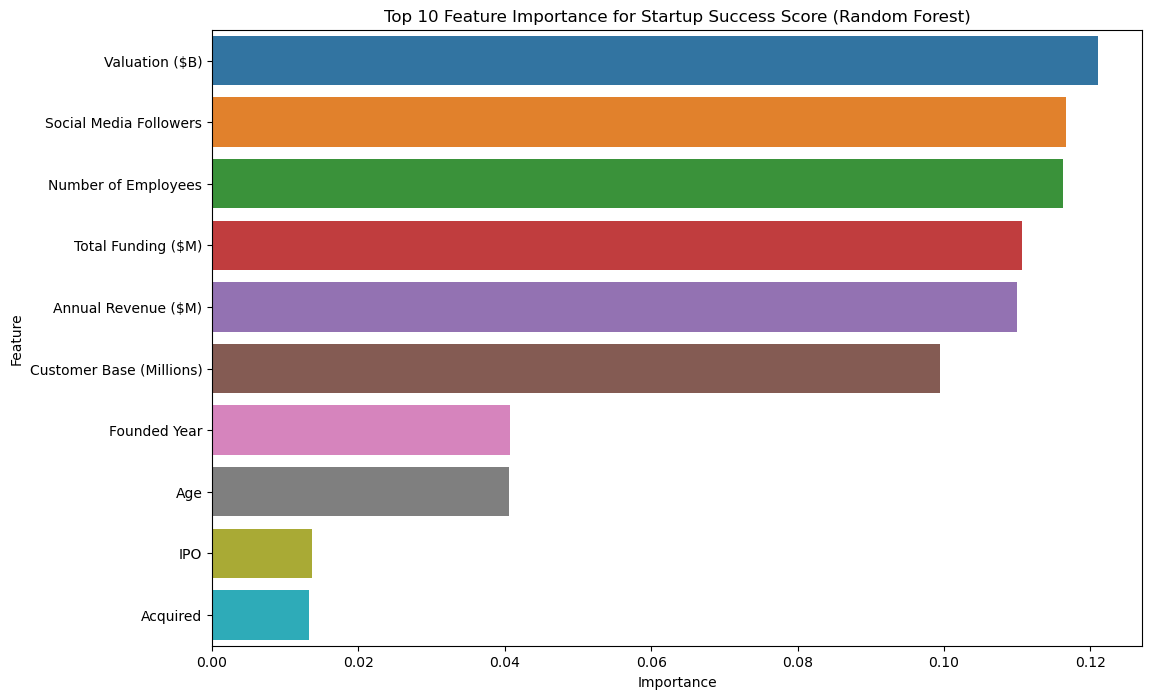

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', hue='Feature', data=rf_feature_importance.head(10), palette='tab10', legend=False)
plt.title('Top 10 Feature Importance for Startup Success Score (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

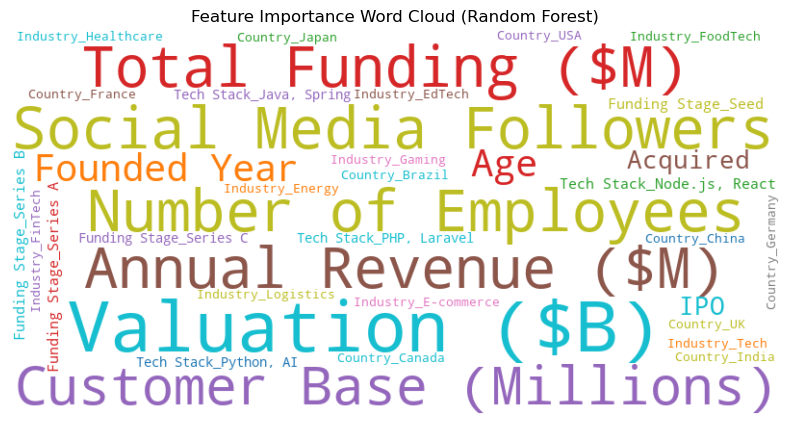

In [ ]:
from wordcloud import WordCloud
rf_wordcloud_dict = dict(zip(rf_feature_importance['Feature'], rf_feature_importance['Importance']))
wordcloud_rf = WordCloud(width=800, height=400, background_color='white', colormap='tab10').generate_from_frequencies(rf_wordcloud_dict)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_rf, interpolation='bilinear')
plt.axis('off')
plt.title('Feature Importance Word Cloud (Random Forest)')
plt.show()

In [ ]:
xgb = XGBRegressor(n_estimators=100, random_state=42, objective='reg:squarederror')
xgb.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
xgb_feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb.feature_importances_
}).sort_values(by='Importance', ascending=False)

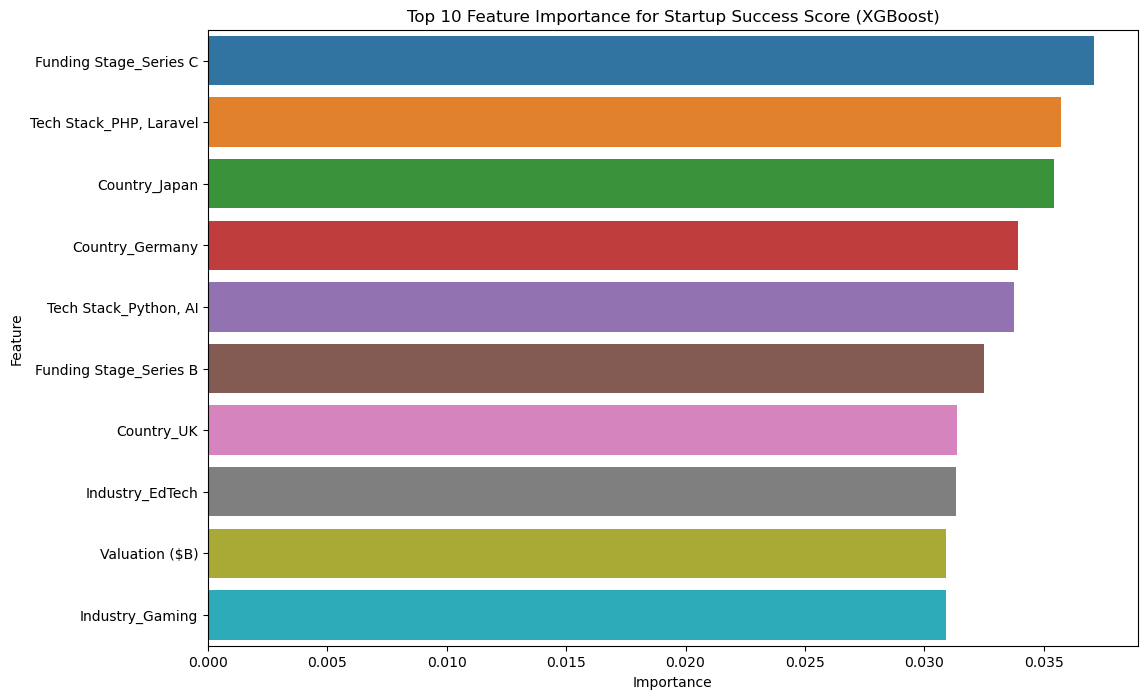

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', hue='Feature', data=xgb_feature_importance.head(10), palette='tab10', legend=False)
plt.title('Top 10 Feature Importance for Startup Success Score (XGBoost)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

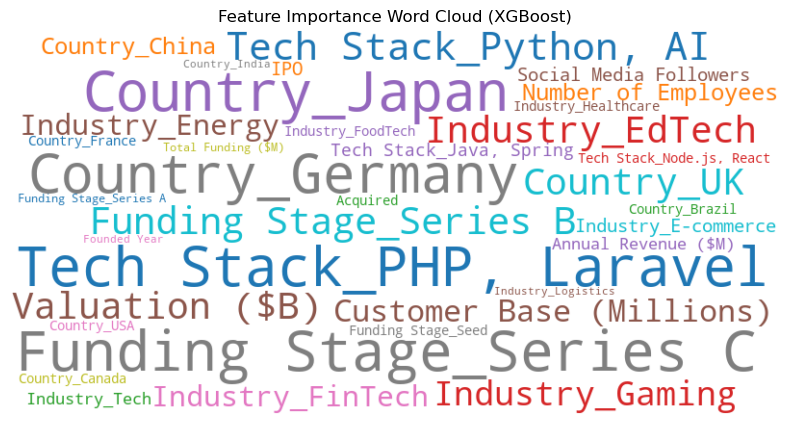

In [ ]:
xgb_wordcloud_dict = dict(zip(xgb_feature_importance['Feature'], xgb_feature_importance['Importance']))
wordcloud_xgb = WordCloud(width=800, height=400, background_color='white', colormap='tab10').generate_from_frequencies(xgb_wordcloud_dict)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_xgb, interpolation='bilinear')
plt.axis('off')
plt.title('Feature Importance Word Cloud (XGBoost)')
plt.show()